In [1]:
%pip install tensorflowjs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model
import tensorflow as tf

In [5]:
dataset_path = '/content/drive/MyDrive/ngaksara/dataset'

In [6]:
if os.path.exists(dataset_path):
    print(f"✓ Dataset ditemukan di: {dataset_path}")
    print(f"✓ Jumlah folder kelas: {len(os.listdir(dataset_path))}")
    print(f"✓ Nama kelas: {os.listdir(dataset_path)}")
else:
    print(f"✗ Dataset tidak ditemukan di: {dataset_path}")
    print("Pastikan Anda sudah mount Drive dan path benar!")

✓ Dataset ditemukan di: /content/drive/MyDrive/ngaksara/dataset
✓ Jumlah folder kelas: 30
✓ Nama kelas: ['fa', 'a', 'ae', 'e', 'da', 'ha', 'eu', 'ga', 'ba', 'ca', 'ja', 'ka', 'na', 'nga', 'ma', 'nya', 'o', 'la', 'pa', 'i', 'ra', 'qa', 'xa', 'wa', 'ta', 'va', 'ya', 'u', 'za', 'sa']


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(30, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         3,87

 Total params: 21,174,238 (80.77 MB)

 Trainable params: 6,459,550 (24.64 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 1440 images belonging to 30 classes.


In [10]:
import json

class_indices_path = '/content/drive/MyDrive/ngaksara/model/tfjs_best_model/class_labels.json'
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

with open(class_indices_path, 'w') as f:
    json.dump(index_to_class, f, indent=2)

print(f"✓ Class labels saved to: {class_indices_path}")

✓ Class labels saved to: /content/drive/MyDrive/ngaksara/model/tfjs_best_model/class_labels.json


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 360 images belonging to 30 classes.


In [ ]:
print("INFORMASI DATASET")
print(f"Jumlah kelas: {len(train_generator.class_indices)}")
print(f"Nama kelas: {list(train_generator.class_indices.keys())}")
print(f"Jumlah data training: {train_generator.samples}")
print(f"Jumlah data validation: {validation_generator.samples}")
print(f"Total data: {train_generator.samples + validation_generator.samples}")

INFORMASI DATASET
Jumlah kelas: 30
Nama kelas: ['a', 'ae', 'ba', 'ca', 'da', 'e', 'eu', 'fa', 'ga', 'ha', 'i', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'o', 'pa', 'qa', 'ra', 'sa', 'ta', 'u', 'va', 'wa', 'xa', 'ya', 'za']
Jumlah data training: 1440
Jumlah data validation: 360
Total data: 1800


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint_path = '/content/drive/MyDrive/ngaksara/model/best.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.0520 - loss: 3.6005 
Epoch 1: val_accuracy improved from -inf to 0.18611, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 630s 14s/step - accuracy: 0.0520 - loss: 3.5970 - val_accuracy: 0.1861 - val_loss: 3.2194 - learning_rate: 1.0000e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.0916 - loss: 3.2444
Epoch 2: val_accuracy improved from 0.18611 to 0.29444, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.0919 - loss: 3.2438 - val_accuracy: 0.2944 - val_loss: 3.0509 - learning_rate: 1.0000e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.1417 - loss: 3.1015
Epoch 3: val_accuracy improved from 0.29444 to 0.35833, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.1420 - loss: 3.1005 - val_accuracy: 0.3583 - val_loss: 2.8794 - learning_rate: 1.0000e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.1774 - loss: 2.9415
Epoch 4: val_accuracy improved from 0.35833 to 0.42500, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.1775 - loss: 2.9410 - val_accuracy: 0.4250 - val_loss: 2.7234 - learning_rate: 1.0000e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.2166 - loss: 2.7834
Epoch 5: val_accuracy improved from 0.42500 to 0.53889, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.2166 - loss: 2.7833 - val_accuracy: 0.5389 - val_loss: 2.5275 - learning_rate: 1.0000e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.2336 - loss: 2.6712
Epoch 6: val_accuracy improved from 0.53889 to 0.61667, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 312ms/step - accuracy: 0.2340 - loss: 2.6700 - val_accuracy: 0.6167 - val_loss: 2.3834 - learning_rate: 1.0000e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.2805 - loss: 2.4855
Epoch 7: val_accuracy improved from 0.61667 to 0.67778, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - accuracy: 0.2806 - loss: 2.4850 - val_accuracy: 0.6778 - val_loss: 2.1808 - learning_rate: 1.0000e-04
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.3114 - loss: 2.3730
Epoch 8: val_accuracy improved from 0.67778 to 0.71667, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.3115 - loss: 2.3727 - val_accuracy: 0.7167 - val_loss: 1.9354 - learning_rate: 1.0000e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.3595 - loss: 2.2123
Epoch 9: val_accuracy improved from 0.71667 to 0.76389, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.3593 - loss: 2.2128 - val_accuracy: 0.7639 - val_loss: 1.8074 - learning_rate: 1.0000e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.3931 - loss: 2.1378
Epoch 10: val_accuracy improved from 0.76389 to 0.80833, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.3932 - loss: 2.1374 - val_accuracy: 0.8083 - val_loss: 1.6917 - learning_rate: 1.0000e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.4232 - loss: 2.0134
Epoch 11: val_accuracy did not improve from 0.80833
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.4234 - loss: 2.0131 - val_accuracy: 0.7917 - val_loss: 1.5411 - learning_rate: 1.0000e-04
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.4255 - loss: 1.9462
Epoch 12: val_accuracy improved from 0.80833 to 0.83333, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.4260 - loss: 1.9454 - val_accuracy: 0.8333 - val_loss: 1.4180 - learning_rate: 1.0000e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.4447 - loss: 1.8829
Epoch 13: val_accuracy improved from 0.83333 to 0.83889, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.4454 - loss: 1.8814 - val_accuracy: 0.8389 - val_loss: 1.3285 - learning_rate: 1.0000e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.5040 - loss: 1.6732
Epoch 14: val_accuracy improved from 0.83889 to 0.84167, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - accuracy: 0.5038 - loss: 1.6736 - val_accuracy: 0.8417 - val_loss: 1.2309 - learning_rate: 1.0000e-04
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5115 - loss: 1.6768
Epoch 15: val_accuracy did not improve from 0.84167
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.5117 - loss: 1.6765 - val_accuracy: 0.8278 - val_loss: 1.1471 - learning_rate: 1.0000e-04
Epoch 16/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5385 - loss: 1.5907
Epoch 16: val_accuracy improved from 0.84167 to 0.86111, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.5385 - loss: 1.5908 - val_accuracy: 0.8611 - val_loss: 1.0720 - learning_rate: 1.0000e-04
Epoch 17/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.5506 - loss: 1.5185
Epoch 17: val_accuracy did not improve from 0.86111
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.5509 - loss: 1.5178 - val_accuracy: 0.8556 - val_loss: 0.9818 - learning_rate: 1.0000e-04
Epoch 18/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5704 - loss: 1.4617
Epoch 18: val_accuracy improved from 0.86111 to 0.89722, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.5702 - loss: 1.4620 - val_accuracy: 0.8972 - val_loss: 0.9449 - learning_rate: 1.0000e-04
Epoch 19/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.5800 - loss: 1.4267
Epoch 19: val_accuracy did not improve from 0.89722
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.5802 - loss: 1.4256 - val_accuracy: 0.8861 - val_loss: 0.8902 - learning_rate: 1.0000e-04
Epoch 20/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5936 - loss: 1.3456
Epoch 20: val_accuracy did not improve from 0.89722
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - accuracy: 0.5937 - loss: 1.3453 - val_accuracy: 0.8972 - val_loss: 0.8456 - learning_rate: 1.0000e-04
Epoch 21/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5991 - loss: 1.2982
Epoch 21: val_accuracy improved from 0.89722 to 0.90556, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.5995 - loss: 1.2975 - val_accuracy: 0.9056 - val_loss: 0.7704 - learning_rate: 1.0000e-04
Epoch 22/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.6564 - loss: 1.2107
Epoch 22: val_accuracy improved from 0.90556 to 0.90833, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.6565 - loss: 1.2106 - val_accuracy: 0.9083 - val_loss: 0.7174 - learning_rate: 1.0000e-04
Epoch 23/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6307 - loss: 1.2454
Epoch 23: val_accuracy did not improve from 0.90833
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.6311 - loss: 1.2441 - val_accuracy: 0.9083 - val_loss: 0.6775 - learning_rate: 1.0000e-04
Epoch 24/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.6569 - loss: 1.1530
Epoch 24: val_accuracy did not improve from 0.90833
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.6570 - loss: 1.1531 - val_accuracy: 0.9056 - val_loss: 0.6557 - learning_rate: 1.0000e-04
Epoch 25/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.7043 - loss: 1.0052
Epoch 25: val_accuracy did not improve from 0.90833
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.7039 - loss: 1.0066 - val_accuracy: 0.9028 - val_loss: 0.6316 - learning_rate: 1.0000e-04

45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - accuracy: 0.6767 - loss: 1.1060 - val_accuracy: 0.9167 - val_loss: 0.5992 - learning_rate: 1.0000e-04
Epoch 27/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6877 - loss: 1.0155
Epoch 27: val_accuracy did not improve from 0.91667
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.6877 - loss: 1.0153 - val_accuracy: 0.9139 - val_loss: 0.5609 - learning_rate: 1.0000e-04
Epoch 28/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.6837 - loss: 1.0253
Epoch 28: val_accuracy did not improve from 0.91667
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.6841 - loss: 1.0245 - val_accuracy: 0.9167 - val_loss: 0.5221 - learning_rate: 1.0000e-04
Epoch 29/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.7217 - loss: 0.9663
Epoch 29: val_accuracy improved from 0.91667 to 0.93333, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.7214 - loss: 0.9660 - val_accuracy: 0.9333 - val_loss: 0.4994 - learning_rate: 1.0000e-04
Epoch 30/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7150 - loss: 0.9566
Epoch 30: val_accuracy did not improve from 0.93333
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.7148 - loss: 0.9569 - val_accuracy: 0.9194 - val_loss: 0.4707 - learning_rate: 1.0000e-04
Epoch 31/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.7309 - loss: 0.8969
Epoch 31: val_accuracy did not improve from 0.93333
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 255ms/step - accuracy: 0.7309 - loss: 0.8968 - val_accuracy: 0.9278 - val_loss: 0.4635 - learning_rate: 1.0000e-04
Epoch 32/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7347 - loss: 0.8666
Epoch 32: val_accuracy did not improve from 0.93333
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.7344 - loss: 0.8671 - val_accuracy: 0.9306 - val_loss: 0.4429 - learning_rate: 1.0000e-04

45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.7630 - loss: 0.8444 - val_accuracy: 0.9417 - val_loss: 0.3703 - learning_rate: 1.0000e-04
Epoch 37/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7666 - loss: 0.7388
Epoch 37: val_accuracy did not improve from 0.94167
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.7666 - loss: 0.7388 - val_accuracy: 0.9389 - val_loss: 0.3614 - learning_rate: 1.0000e-04
Epoch 38/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.7525 - loss: 0.7590
Epoch 38: val_accuracy did not improve from 0.94167
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 285ms/step - accuracy: 0.7529 - loss: 0.7583 - val_accuracy: 0.9333 - val_loss: 0.3331 - learning_rate: 1.0000e-04
Epoch 39/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.7996 - loss: 0.7219
Epoch 39: val_accuracy improved from 0.94167 to 0.94444, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - accuracy: 0.7994 - loss: 0.7217 - val_accuracy: 0.9444 - val_loss: 0.3193 - learning_rate: 1.0000e-04
Epoch 40/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7644 - loss: 0.7640
Epoch 40: val_accuracy did not improve from 0.94444
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.7647 - loss: 0.7631 - val_accuracy: 0.9361 - val_loss: 0.3041 - learning_rate: 1.0000e-04
Epoch 41/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.7993 - loss: 0.6978
Epoch 41: val_accuracy did not improve from 0.94444
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - accuracy: 0.7992 - loss: 0.6975 - val_accuracy: 0.9444 - val_loss: 0.2972 - learning_rate: 1.0000e-04
Epoch 42/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7856 - loss: 0.6975
Epoch 42: val_accuracy did not improve from 0.94444
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7859 - loss: 0.6971 - val_accuracy: 0.9389 - val_loss: 0.2969 - learning_rate: 1.0000e-04


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.8110 - loss: 0.5982 - val_accuracy: 0.9500 - val_loss: 0.2338 - learning_rate: 1.0000e-04
Epoch 50/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8394 - loss: 0.5455
Epoch 50: val_accuracy improved from 0.95000 to 0.96111, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.8395 - loss: 0.5452 - val_accuracy: 0.9611 - val_loss: 0.2312 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 50.


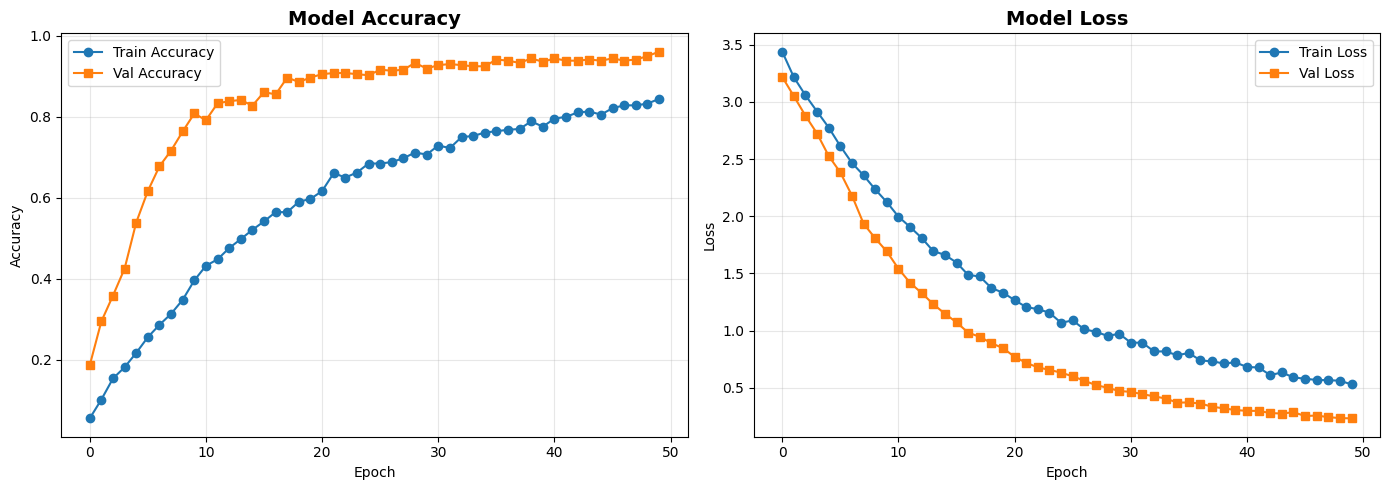

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s')
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
best_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

print("HASIL TRAINING")
print(f"Total Epoch Dijalankan: {len(history.history['accuracy'])}")
print(f"Best Epoch: {best_epoch}")
print(f"Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"\nFinal Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

HASIL TRAINING
Total Epoch Dijalankan: 50
Best Epoch: 50
Best Validation Accuracy: 0.9611 (96.11%)

Final Training Accuracy: 0.8444 (84.44%)
Final Validation Accuracy: 0.9611 (96.11%)
Final Training Loss: 0.5284
Final Validation Loss: 0.2312


In [ ]:
checkpoint_path = '/content/drive/MyDrive/ngaksara/model/best.h5'
model_save_path = '/content/drive/MyDrive/ngaksara/model/model_ngaksara.h5'
tfjs_model_path = '/content/drive/MyDrive/ngaksara/model/tfjs_best_model'

print("Loading best model...")
best_model = load_model(checkpoint_path)
print(f"✓ Best model loaded dari: {checkpoint_path}")

best_model.save(model_save_path)
print(f"✓ Best model juga disimpan di: {model_save_path}")

print("\nConverting to TensorFlow.js format...")
tfjs.converters.save_keras_model(best_model, tfjs_model_path)
print(f"✓ Model TensorFlow.js tersimpan di: {tfjs_model_path}")

print("\n📁 Files generated:")
for file in os.listdir(tfjs_model_path):
    file_path = os.path.join(tfjs_model_path, file)
    size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"  - {file} ({size:.2f} MB)")

Loading best model...


✓ Best model loaded dari: /content/drive/MyDrive/ngaksara/model/best.h5


✓ Best model juga disimpan di: /content/drive/MyDrive/ngaksara/model/model_ngaksara.h5

Converting to TensorFlow.js format...
failed to lookup keras version from the file,
    this is likely a weight only file
✓ Model TensorFlow.js tersimpan di: /content/drive/MyDrive/ngaksara/model/tfjs_best_model

📁 Files generated:
  - group1-shard1of21.bin (4.00 MB)
  - group1-shard2of21.bin (4.00 MB)
  - group1-shard3of21.bin (4.00 MB)
  - group1-shard4of21.bin (4.00 MB)
  - group1-shard5of21.bin (4.00 MB)
  - group1-shard6of21.bin (4.00 MB)
  - group1-shard7of21.bin (4.00 MB)
  - group1-shard8of21.bin (4.00 MB)
  - group1-shard9of21.bin (4.00 MB)
  - group1-shard10of21.bin (4.00 MB)
  - group1-shard11of21.bin (4.00 MB)
  - group1-shard12of21.bin (4.00 MB)
  - group1-shard13of21.bin (4.00 MB)
  - group1-shard14of21.bin (4.00 MB)
  - group1-shard15of21.bin (4.00 MB)
  - group1-shard16of21.bin (4.00 MB)
  - group1-shard17of21.bin (4.00 MB)
  - group1-shard18of21.bin (4.00 MB)
  - group1-shard19of21.

In [8]:
checkpoint_path = '/content/drive/MyDrive/ngaksara/model/best.h5'
tfjs_model_path = '/content/drive/MyDrive/ngaksara/model/tfjs_graph_model'

!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    {checkpoint_path} \
    {tfjs_model_path}

print(f"✓ LayersModel conversion complete!")

2025-12-03 12:35:19.347389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764765319.369249    6543 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764765319.379269    6543 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764765319.400717    6543 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764765319.400747    6543 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764765319.400752    6543 computation_placer.cc:177] computation placer alr

In [6]:
checkpoint_path = '/content/drive/MyDrive/ngaksara/model/best.h5'
saved_model_path = '/content/drive/MyDrive/ngaksara/model/saved_model'
print("Loading best model from H5...")
best_model = load_model(checkpoint_path)
print(f"✓ Model loaded from: {checkpoint_path}")

print("\nSaving as TensorFlow SavedModel...")
tf.saved_model.save(best_model, saved_model_path)
print(f"✓ SavedModel saved to: {saved_model_path}")

print("\nVerifying SavedModel files:")
import os
for root, dirs, files in os.walk(saved_model_path):
    for file in files:
        print(f"  - {os.path.join(root, file)}")

Loading best model from H5...


✓ Model loaded from: /content/drive/MyDrive/ngaksara/model/best.h5

Saving as TensorFlow SavedModel...


TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [3]:
saved_model_path = '/content/drive/MyDrive/ngaksara/model/saved_model'
tfjs_model_path = '/content/drive/MyDrive/ngaksara/model/tfjs_graph_model'
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --signature_name=serving_default \
    --saved_model_tags=serve \
    {checkpoint_path} \
    {tfjs_model_graph_path}

print(f"✓ TensorFlow.js Graph Model saved to: {tfjs_model_graph_path}")

2025-12-03 12:15:50.888950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764764150.908736    1634 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764764150.914677    1634 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764764150.929195    1634 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764764150.929217    1634 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764764150.929221    1634 computation_placer.cc:177] computation placer alr